# Import 


In [76]:
import os
from tqdm import tqdm
import tensorflow as tf
import cv2
#import numpy as np
import scipy
from tensorflow.keras import datasets,models,layers
import tflearn
#from tflearn.layers.conv import conv_2d,max_pool_2d
#from tflearn.layers.core import input_data,dropout,fully_connected
#from tflearn.layers.estimator import regression

!pip install numpy==1.16.2
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fetch data

In [0]:
train_data_bw = np.load('/content/drive/My Drive/dataset_fin/train_bw_fin.npy')
train_data_r =  np.load('/content/drive/My Drive/dataset_fin/r_chan_train.npy')
train_data_g =  np.load('/content/drive/My Drive/dataset_fin/g_chan_train.npy')
train_data_b =  np.load('/content/drive/My Drive/dataset_fin/b_chan_train.npy')



In [68]:
print(train_data_bw.shape)
print(train_data_r.shape)
print(train_data_g.shape)
print(train_data_b.shape)

(276, 310, 512)
(276, 310, 512)
(276, 310, 512)
(276, 310, 512)


#Convolutional Neural Network Red Channel



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Activation ,Flatten , Conv1D ,MaxPooling2D,Conv2D,MaxPooling1D
from keras.utils import plot_model
from keras.engine import InputLayer


# model - (1-9-2)
# data
bw_data     =  train_data_bw   ## b/w image
col_data    =  train_data_r    ## color image  - red channel


img_cols = 512
img_rows = 310

bw_data =   bw_data.reshape(276, img_rows , img_cols, 1)
col_data =  col_data.reshape(276,img_rows,img_cols,1)   ##color images 

#print("The input data array is shaped:" + str(bw_data.shape))
#print("The target data array is shaped:" + str(col_data.shape))

model1 = tf.keras.models.Sequential()

# first convolutional block nf1 = 16 nk = 3x3 
# each block consists of 3 convolution layers
model1.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape=(310,512,1),padding = 'same',activation='relu'  ))  
model1.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))   
model1.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))   


# #first pooling layer   size = 2x2
model1.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
# each block consists of 3 convolution layers
model1.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model1.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model1.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model1.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
# each block consists of 3 convolution layers
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model1.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))
 




model1.add( Dense(1, activation='relu') )

# print model summary 
print(model1.summary())

# #fully connected layer
print(model1.output_shape)
#model1.add(Flatten())
print(model1.input_shape)



# # train!!

model1.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

#model1.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0) 
model1.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0.02)
model1.save('/content/drive/My Drive/run0modelR.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 310, 512, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 310, 512, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 310, 512, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 310, 512, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 310, 512, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 310, 512, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 310, 512, 32)      9

# Convolutional Neural Network Green channel

In [6]:

#data
bw_data     =  train_data_bw   ## b/w image
col_data    =  train_data_g  ## color image  - red channel


img_cols = 512
img_rows = 310

bw_data = bw_data.reshape(276, img_rows , img_cols, 1)
#col_data =  col_data[0].reshape()   ##color images 
col_data = col_data.reshape(276,img_rows,img_cols,1)   ##color images 


#print("The input data array is shaped:" + str(bw_data.shape))
#print("The target data array is shaped:" + str(col_data.shape))

ip_shape=(img_rows, img_cols, 1)

model2 = tf.keras.models.Sequential()


# first convolutional block nf1 = 16 nk = 3x3 

model2.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape=(310,512,1),padding = 'same',activation='relu'  ))  
model2.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))  
model2.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))  


# #first pooling layer   size = 2x2
model2.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
model2.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model2.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model2.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model2.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model2.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))
 




model2.add( Dense(1, activation='relu') )
print(model2.summary())

# #fully connected layer
print(model2.output_shape)
#model.add(Flatten())
print(model2.input_shape)



# # train!!
model2.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])
#model.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0) 
model2.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0.02)
model2.save('/content/drive/My Drive/run0modelG.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 310, 512, 16)      160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 310, 512, 16)      2320      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 310, 512, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 310, 512, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 310, 512, 32)      4640      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 310, 512, 32)      9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 310, 512, 32)     

# Convolutional Neural Network Blue Channel

In [73]:

#data
bw_data     =  train_data_bw   ## b/w image
col_data    =  train_data_b    ## color image  - red channel


img_cols = 512
img_rows = 310

bw_data = bw_data.reshape(276, img_rows , img_cols, 1)
col_data =  col_data.reshape(276, img_rows , img_cols, 1)   ##color images 

#print("The input data array is shaped:" + str(bw_data.shape))
#print("The target data array is shaped:" + str(col_data.shape))

ip_shape=(img_cols, img_rows, 1)

model3 = tf.keras.models.Sequential()

# first convolutional block nf1 = 16 nk = 3x3 

model3.add(  Conv2D( 16, kernel_size=(3,3) ,input_shape=(310,512,1),padding = 'same',activation='relu'  ))   # add input_shape = X.shape()
model3.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu'  ))   # add input_shape = X.shape()
model3.add(  Conv2D( 16, kernel_size=(3,3) ,padding = 'same',activation='relu' ))   # add input_shape = X.shape()


# #first pooling layer   size = 2x2
model3.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#print(ip_shape)

#second convolutional block nf2 = 32,nk= 3x3
model3.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model3.add(  Conv2D( 32, kernel_size=(3,3),padding = 'same',activation='relu' ))
model3.add(  Conv2D( 32, kernel_size=(3,3) ,padding = 'same',activation='relu'))



#second pooling layer   size = 2x2
model3.add( MaxPooling2D(pool_size=(2,2), padding = 'same', strides= (1,1)))

#third and final convolutional block nf3= 64,nk = 3x3
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu' ))
model3.add(  Conv2D( 64, kernel_size=(3,3) ,padding = 'same',activation='relu'))
 




model3.add( Dense(1, activation='relu') )

#print model summary
print(model3.summary())

# #fully connected layer
print(model3.output_shape)
#model.add(Flatten())
print(model3.input_shape)


# # train!!
model3.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])
#model.fit(x = bw_data, y = col_data , epochs = 5 , verbose = 2 , validation_split = 0) 
model3.fit(x = bw_data, y = col_data ,batch_size = 50,epochs = 25 , verbose = 2 , validation_split = 0.02)
model3.save('/content/drive/My Drive/run1modelB.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 310, 512, 16)      160       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 310, 512, 16)      2320      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 310, 512, 16)      2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 310, 512, 16)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 310, 512, 32)      4640      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 310, 512, 32)      9248      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 310, 512, 32)     

# Get Predictions


In [81]:
import h5py
import tensorflow as tf



r_model = tf.keras.models.load_model('/content/drive/My Drive/run1modelR.h5')
g_model = tf.keras.models.load_model('/content/drive/My Drive/run1modelG.h5')
b_model = tf.keras.models.load_model('/content/drive/My Drive/run1modelB.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [97]:
test_data_bw = np.load('/content/drive/My Drive/dataset_fin/test_bw_fin.npy')
test_data_r =  np.load('/content/drive/My Drive/dataset_fin/r_chan_test.npy')
test_data_g =  np.load('/content/drive/My Drive/dataset_fin/g_chan_test.npy')
test_data_b =  np.load('/content/drive/My Drive/dataset_fin/b_chan_test.npy')

test_data_bw = test_data_bw.reshape(40,310,512,1)

r_data2 = model1.predict(test_data_bw,verbose = 2)
g_data2 = model2.predict(test_data_bw,verbose = 2)
b_data2 = model3.predict(test_data_bw,verbose = 2)

np.save('\content\drive\My Drive\r_datarun2.npy',r_data2)
np.save('\content\drive\My Drive\g_datarun2.npy',g_data2)
np.save('\content\drive\My Drive\b_datarun2.npy',b_data2)

40/40 - 17s
40/40 - 17s
40/40 - 17s


In [0]:
np.save('/content/drive/My Drive/r_data.npy',r_data)
np.save('/content/drive/My Drive/g_data.npy',g_data)
np.save('/content/drive/My Drive/b_data.npy',b_data)

# Group channels to get images

In [0]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt


r_data2 = r_data2.reshape(40,310,512)
g_data2 = g_data2.reshape(40,310,512)
b_data2 = b_data2.reshape(40,310,512)

In [0]:

x = np.dstack((r_data2[0],g_data2[0],b_data2[0]))


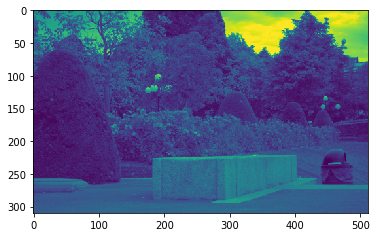

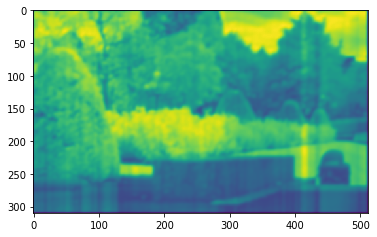

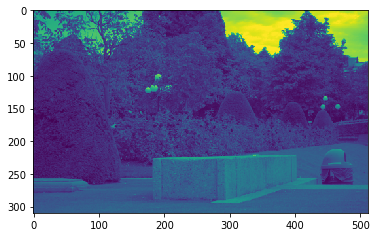

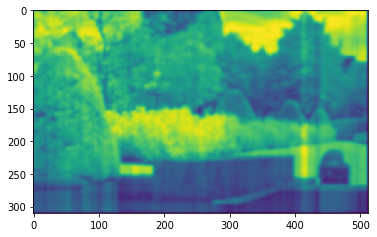

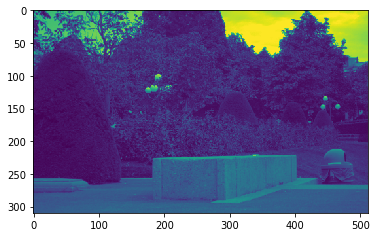

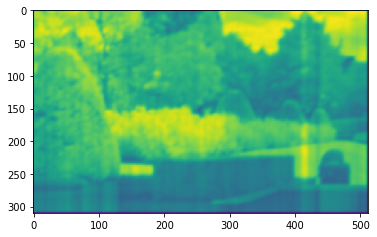

In [101]:
x = 1
plt.figure(1)
imshow(test_data_r[x])
plt.figure(2)
imshow(r_data2[x])
plt.figure(3)
imshow(test_data_g[x])
plt.figure(4)
imshow(g_data2[x])
plt.figure(5)
imshow(test_data_b[x])
plt.figure(6)
imshow(b_data2[x])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

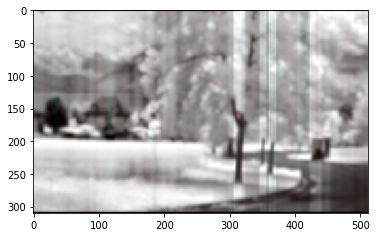

In [58]:
# plt.figure(1)
# imshow(r_data[0])

# plt.figure(2)
# imshow(g_data[0])

# plt.figure(3)
# imshow(b_data[0])

z = np.zeros((310,512,3))

z[:,:,0] = r_data[0]
z[:,:,1] = g_data[0]
z[:,:,2] = b_data[0]

# for i in range(0,310):
#   for j in range(0,512):
#     r_data[0][i,j] = np.int(r_data[0][i,j])

# for i in range(0,310):
#   for j in range(0,512):
#     g_data[0][i,j] = np.int(g_data[0][i,j])

# for i in range(0,310):
#   for j in range(0,512):
#     g_data[0][i,j] = np.int(b_data[0][i,j])
 
 



#imshow([r_data[0],g_data[0],b_data[0]])


from sklearn.preprocessing import MinMaxScaler
rho = MinMaxScaler()



z1 = rho.fit_transform(r_data[0])
z2 = rho.fit_transform(g_data[0])
z3 = rho.fit_transform(b_data[0])

z_lat = np.zeros((310,512,3))

z_lat[:,:,0] = z1
z_lat[:,:,1] = z2
z_lat[:,:,2] = z3

plt.figure(4)
imshow(z_lat)

cv2.imwrite('/content/drive/My Drive/abc.tiff',z)



In [0]:
from PIL import Image
rgbArray = np.zeros((310,512,3), 'uint8')
rgbArray[..., 0] = r_data[200]
rgbArray[..., 1] = g_data[200]
rgbArray[..., 2] = b_data[200]
img = Image.fromarray(rgbArray)
img.save('myimg.jpeg')



In [57]:


#define no of images in dataset
N_set = 2

final_prediction = []

for i in range (1,N_set):
  image = []
  image.append(r_data[i])
  image.append(g_data[i])
  image.append(b_data[i])
  final_prediction.append(image)

for i in range (1,10):
  plt.figure(2*i-1)
  imshow(final_prediction[i])
  plt.figure(2*i)
  imshow([train_data_r[i],train_data_g[i],train_data_b[i]])

IndexError: ignored

<Figure size 432x288 with 0 Axes>